In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"Downloads\US COVID.csv")
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273,470516.0,150757.0,19414,6964.0,7162,NaN,NaN,21,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,01-02-2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01-03-2022 15:18,NaN,NaN
2,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
3,07/23/2020,TX,361125,NaN,NaN,9507,0.0,7981,NaN,NaN,281,0.0,07/25/2020 12:00:00 AM,Not agree,Not agree
4,08-12-2020,AS,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,08/13/2020 02:12:28 PM,NaN,NaN


In [3]:
df.describe()



,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,5.382000e+04,3.009900e+04,30027.000000,53820.000000,50207.000000,53820.000000,29546.000000,29546.000000,53820.000000,50239.000000
mean,5.524354e+05,5.587974e+05,86769.070070,1626.336659,263.341964,8425.103679,8378.662628,974.844920,18.543776,1.919365
std,1.002146e+06,9.236822e+05,131769.726129,5183.012984,1493.053432,13447.486720,10071.733855,1419.749032,45.340015,25.951921
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-171804.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,1.299925e+04,5.173200e+04,98.500000,15.000000,0.000000,266.000000,1130.250000,0.000000,0.000000,0.000000
50%,1.743010e+05,2.468810e+05,22593.000000,364.000000,2.000000,2794.500000,4621.000000,273.000000,3.000000,0.000000
75%,6.939730e+05,7.388300e+05,123974.000000,1435.000000,173.000000,10883.000000,12679.000000,1470.000000,17.000000,1.000000
max,1.021249e+07,9.500376e+06,712115.000000,319809.000000,171617.000000,91795.000000,71408.000000,7266.000000,1178.000000,2919.000000


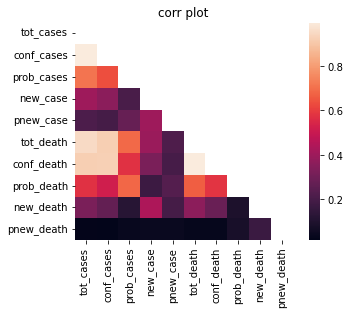

In [4]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
ax = plt.axes()
sns.heatmap(corr_matrix, mask=mask, square=True, ax=ax)
ax.set_title('corr plot')
plt.show()

In [5]:
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         23721
prob_cases         23793
new_case               0
pnew_case           3613
tot_death              0
conf_death         24274
prob_death         24274
new_death              0
pnew_death          3581
created_at             0
consent_cases       8975
consent_deaths      8073
dtype: int64

In [6]:
missing_num_var = [var for var in df.columns if df[var].isnull().sum()>0]
missing_num_var


['conf_cases',
 'prob_cases',
 'pnew_case',
 'conf_death',
 'prob_death',
 'pnew_death',
 'consent_cases',
 'consent_deaths']

C:\Users\91964\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91964\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91964\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: num must be 1 <= num <= 4, not 5

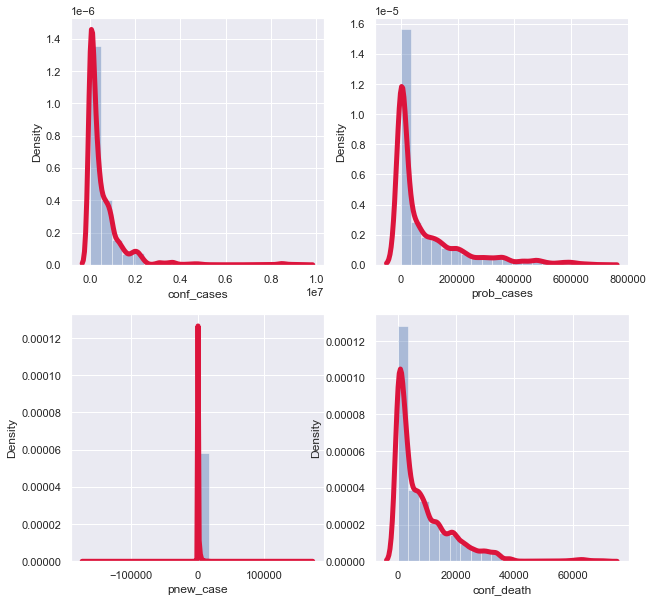

In [7]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [ ]:
num_var_miss = ['conf_cases','prob_cases', 'pnew_case','conf_death','prob_death','pnew_death','consent_cases','consent_deaths']
df[num_var_miss][df[num_var_miss].isnull().any(axis=1)]

In [8]:
num_var_miss1 = ['conf_cases','prob_cases', 'pnew_case','conf_death','prob_death','pnew_death']
df[num_var_miss1][df[num_var_miss1].isnull().any(axis=1)]


,conf_cases,prob_cases,pnew_case,conf_death,prob_death,pnew_death
0,470516.0,150757.0,6964.0,NaN,NaN,4.0
1,NaN,NaN,0.0,NaN,NaN,0.0
2,NaN,NaN,0.0,NaN,NaN,0.0
3,NaN,NaN,0.0,NaN,NaN,0.0
4,NaN,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...
53813,NaN,NaN,0.0,NaN,NaN,0.0
53814,NaN,NaN,0.0,NaN,NaN,0.0
53815,NaN,NaN,0.0,64.0,1.0,1.0
53817,NaN,NaN,17.0,1601.0,366.0,1.0


In [9]:
df['conf_cases'].fillna((df['conf_cases'].mean()), inplace = True)
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273,470516.000000,150757.0,19414,6964.0,7162,NaN,NaN,21,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,01-02-2022,AS,11,558797.352304,NaN,0,0.0,0,NaN,NaN,0,0.0,01-03-2022 15:18,NaN,NaN
2,05/30/2022,AK,251425,558797.352304,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
3,07/23/2020,TX,361125,558797.352304,NaN,9507,0.0,7981,NaN,NaN,281,0.0,07/25/2020 12:00:00 AM,Not agree,Not agree
4,08-12-2020,AS,0,558797.352304,NaN,0,0.0,0,NaN,NaN,0,0.0,08/13/2020 02:12:28 PM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53815,06-07-2020,SD,5438,558797.352304,NaN,71,0.0,65,64.0,1.0,0,1.0,06-08-2020 14:55,NaN,Agree
53816,07/22/2020,TN,81974,81190.000000,784.0,3136,27.0,871,840.0,31.0,24,0.0,07/21/2020 12:00:00 AM,Agree,Agree
53817,04/30/2021,SD,122660,558797.352304,NaN,128,17.0,1967,1601.0,366.0,5,1.0,05-01-2021 13:43,NaN,Agree
53818,09/17/2020,TN,175264,169876.000000,5388.0,1053,130.0,2151,2074.0,77.0,24,0.0,09/16/2020 12:00:00 AM,Agree,Agree


In [10]:
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases             0
prob_cases         23793
new_case               0
pnew_case           3613
tot_death              0
conf_death         24274
prob_death         24274
new_death              0
pnew_death          3581
created_at             0
consent_cases       8975
consent_deaths      8073
dtype: int64

In [11]:
df['prob_cases'].fillna((df['prob_cases'].mean()), inplace = True)
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273,470516.000000,150757.00000,19414,6964.0,7162,NaN,NaN,21,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,01-02-2022,AS,11,558797.352304,86769.07007,0,0.0,0,NaN,NaN,0,0.0,01-03-2022 15:18,NaN,NaN
2,05/30/2022,AK,251425,558797.352304,86769.07007,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
3,07/23/2020,TX,361125,558797.352304,86769.07007,9507,0.0,7981,NaN,NaN,281,0.0,07/25/2020 12:00:00 AM,Not agree,Not agree
4,08-12-2020,AS,0,558797.352304,86769.07007,0,0.0,0,NaN,NaN,0,0.0,08/13/2020 02:12:28 PM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53815,06-07-2020,SD,5438,558797.352304,86769.07007,71,0.0,65,64.0,1.0,0,1.0,06-08-2020 14:55,NaN,Agree
53816,07/22/2020,TN,81974,81190.000000,784.00000,3136,27.0,871,840.0,31.0,24,0.0,07/21/2020 12:00:00 AM,Agree,Agree
53817,04/30/2021,SD,122660,558797.352304,86769.07007,128,17.0,1967,1601.0,366.0,5,1.0,05-01-2021 13:43,NaN,Agree
53818,09/17/2020,TN,175264,169876.000000,5388.00000,1053,130.0,2151,2074.0,77.0,24,0.0,09/16/2020 12:00:00 AM,Agree,Agree


In [12]:
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases             0
prob_cases             0
new_case               0
pnew_case           3613
tot_death              0
conf_death         24274
prob_death         24274
new_death              0
pnew_death          3581
created_at             0
consent_cases       8975
consent_deaths      8073
dtype: int64

In [13]:
df['pnew_case'].fillna((df['pnew_case'].mean()), inplace = True)
df['conf_death'].fillna((df['conf_death'].mean()), inplace = True)
df['prob_death'].fillna((df['prob_death'].mean()), inplace = True)
df['pnew_death'].fillna((df['pnew_death'].mean()), inplace = True)
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273,470516.000000,150757.00000,19414,6964.0,7162,8378.662628,974.84492,21,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,01-02-2022,AS,11,558797.352304,86769.07007,0,0.0,0,8378.662628,974.84492,0,0.0,01-03-2022 15:18,NaN,NaN
2,05/30/2022,AK,251425,558797.352304,86769.07007,0,0.0,1252,8378.662628,974.84492,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
3,07/23/2020,TX,361125,558797.352304,86769.07007,9507,0.0,7981,8378.662628,974.84492,281,0.0,07/25/2020 12:00:00 AM,Not agree,Not agree
4,08-12-2020,AS,0,558797.352304,86769.07007,0,0.0,0,8378.662628,974.84492,0,0.0,08/13/2020 02:12:28 PM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53815,06-07-2020,SD,5438,558797.352304,86769.07007,71,0.0,65,64.000000,1.00000,0,1.0,06-08-2020 14:55,NaN,Agree
53816,07/22/2020,TN,81974,81190.000000,784.00000,3136,27.0,871,840.000000,31.00000,24,0.0,07/21/2020 12:00:00 AM,Agree,Agree
53817,04/30/2021,SD,122660,558797.352304,86769.07007,128,17.0,1967,1601.000000,366.00000,5,1.0,05-01-2021 13:43,NaN,Agree
53818,09/17/2020,TN,175264,169876.000000,5388.00000,1053,130.0,2151,2074.000000,77.00000,24,0.0,09/16/2020 12:00:00 AM,Agree,Agree


In [14]:
df.isnull().sum()


submission_date       0
state                 0
tot_cases             0
conf_cases            0
prob_cases            0
new_case              0
pnew_case             0
tot_death             0
conf_death            0
prob_death            0
new_death             0
pnew_death            0
created_at            0
consent_cases      8975
consent_deaths     8073
dtype: int64

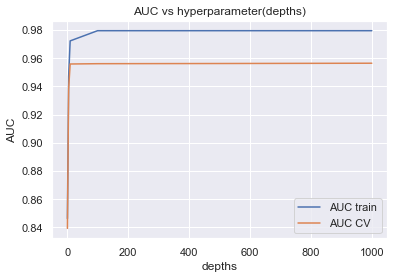

optimal depth for which auc is maximum :  1000
optimal minimum samples split for which auc is maximum :  100


In [62]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X=x
y=np.array(y)





X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)
final_Xtr= X_tr
final_Xcv= X_cv
final_Xtest= X_test

depths = [1,5,10,100,500,1000]
best_m = []
min_samples=[2,5,10,15,100,500]
auc_train=[]
auc_cv=[]

for d in depths:
  ms, rc =0,0
  for m in min_samples:
    dt=DecisionTreeClassifier(max_depth=d,min_samples_split=m)
    dt.fit(final_Xtr,y_tr)
    probc = dt.predict_proba(final_Xcv)[:,1]
    val = roc_auc_score(y_cv,probc)
    if val>rc:
      rc=val
      ms=m
  dt=DecisionTreeClassifier(max_depth=d,min_samples_split=ms)
  dt.fit(final_Xtr,y_tr)
  probcv=dt.predict_proba(final_Xcv)[:,1]
  auc_cv.append(roc_auc_score(y_cv,probcv))
  probtr=dt.predict_proba(final_Xtr)[:,1]
  auc_train.append(roc_auc_score(y_tr,probtr))
  best_m.append(ms)

optimal_depth= depths[auc_cv.index(max(auc_cv))]
optimal_min_samples_split=best_m[auc_cv.index(max(auc_cv))]

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(depths, auc_train, label='AUC train')
ax.plot(depths, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter(depths)')
plt.xlabel('depths')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal depth for which auc is maximum : ',optimal_depth)
print('optimal minimum samples split for which auc is maximum : ',optimal_min_samples_split)

In [15]:
cat_var_miss = ['consent_cases']
df[cat_var_miss][df[cat_var_miss].isnull().any(axis=1)]

,consent_cases
1,NaN
2,NaN
4,NaN
6,NaN
17,NaN
...,...
53803,NaN
53804,NaN
53813,NaN
53815,NaN


In [16]:
df.dropna(axis = 0,inplace=True)
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
3,07/23/2020,TX,361125,558797.352304,86769.07007,9507,0.0,7981,8378.662628,974.84492,281,0.0,07/25/2020 12:00:00 AM,Not agree,Not agree
5,06-05-2020,HI,661,558797.352304,86769.07007,8,0.0,17,8378.662628,974.84492,0,0.0,06-06-2020 10:31,Not agree,Not agree
7,10/26/2021,HI,80876,558797.352304,86769.07007,69,10.0,883,8378.662628,974.84492,0,0.0,10/27/2021 02:21:35 PM,Not agree,Not agree
8,07/26/2021,OK,475578,373929.000000,101649.00000,1028,264.0,7488,6379.000000,1109.00000,8,2.0,07/27/2021 02:48:23 PM,Agree,Agree
9,03/14/2020,TX,22,558797.352304,86769.07007,0,0.0,0,8378.662628,974.84492,0,0.0,03/16/2020 12:00:00 AM,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53812,03/17/2022,IA,757334,558797.352304,86769.07007,0,0.0,9349,8378.662628,974.84492,0,0.0,03/18/2022 01:48:08 PM,Not agree,Not agree
53814,05/28/2020,IA,18585,558797.352304,86769.07007,228,0.0,506,8378.662628,974.84492,14,0.0,05/29/2020 02:19:55 PM,Not agree,Not agree
53816,07/22/2020,TN,81974,81190.000000,784.00000,3136,27.0,871,840.000000,31.00000,24,0.0,07/21/2020 12:00:00 AM,Agree,Agree
53818,09/17/2020,TN,175264,169876.000000,5388.00000,1053,130.0,2151,2074.000000,77.00000,24,0.0,09/16/2020 12:00:00 AM,Agree,Agree


In [17]:
df.isnull().sum()

submission_date    0
state              0
tot_cases          0
conf_cases         0
prob_cases         0
new_case           0
pnew_case          0
tot_death          0
conf_death         0
prob_death         0
new_death          0
pnew_death         0
created_at         0
consent_cases      0
consent_deaths     0
dtype: int64

In [18]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
3,07/23/2020,TX,361125,558797.352304,86769.07007,9507,0.0,7981,8378.662628,974.84492,281,0.0,07/25/2020 12:00:00 AM,Not agree,Not agree
5,06-05-2020,HI,661,558797.352304,86769.07007,8,0.0,17,8378.662628,974.84492,0,0.0,06-06-2020 10:31,Not agree,Not agree
7,10/26/2021,HI,80876,558797.352304,86769.07007,69,10.0,883,8378.662628,974.84492,0,0.0,10/27/2021 02:21:35 PM,Not agree,Not agree
8,07/26/2021,OK,475578,373929.000000,101649.00000,1028,264.0,7488,6379.000000,1109.00000,8,2.0,07/27/2021 02:48:23 PM,Agree,Agree
9,03/14/2020,TX,22,558797.352304,86769.07007,0,0.0,0,8378.662628,974.84492,0,0.0,03/16/2020 12:00:00 AM,Not agree,Not agree


In [19]:
!pip install category_encoders

In [20]:
import category_encoders as ce
ce_bin = ce.BinaryEncoder(cols = ['consent_cases','consent_deaths','state'])
final_df = ce_bin.fit_transform(df)

In [21]:
final_df["new_death"].value_counts()

 0      13901
 1       2335
 2       1807
 3       1515
 4       1288
        ...  
-154        1
 656        1
 563        1
 537        1
 368        1
Name: new_death, Length: 499, dtype: int64

# mapping data into  ml classification problem

In [22]:
def partition(x):
    if x < 1:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = final_df['new_death']
positiveNegative = actualScore.map(partition) 
final_df['new_death'] = positiveNegative
final_df.head()
final_df['new_death'].value_counts()

1    28038
0    14121
Name: new_death, dtype: int64

In [23]:
final_df.head()

,submission_date,state_0,state_1,state_2,state_3,state_4,state_5,tot_cases,conf_cases,prob_cases,...,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases_0,consent_cases_1,consent_deaths_0,consent_deaths_1
3,07/23/2020,0,0,0,0,0,1,361125,558797.352304,86769.07007,...,7981,8378.662628,974.84492,1,0.0,07/25/2020 12:00:00 AM,0,1,0,1
5,06-05-2020,0,0,0,0,1,0,661,558797.352304,86769.07007,...,17,8378.662628,974.84492,0,0.0,06-06-2020 10:31,0,1,0,1
7,10/26/2021,0,0,0,0,1,0,80876,558797.352304,86769.07007,...,883,8378.662628,974.84492,0,0.0,10/27/2021 02:21:35 PM,0,1,0,1
8,07/26/2021,0,0,0,0,1,1,475578,373929.000000,101649.00000,...,7488,6379.000000,1109.00000,1,2.0,07/27/2021 02:48:23 PM,1,0,1,0
9,03/14/2020,0,0,0,0,0,1,22,558797.352304,86769.07007,...,0,8378.662628,974.84492,0,0.0,03/16/2020 12:00:00 AM,0,1,0,1


In [24]:
data = final_df.drop(columns=['submission_date','created_at'])

In [25]:
final_df.describe()

,state_0,state_1,state_2,state_3,state_4,state_5,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases_0,consent_cases_1,consent_deaths_0,consent_deaths_1
count,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,4.215900e+04,4.215900e+04,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000
mean,0.340426,0.340426,0.510638,0.510638,0.510638,0.510638,6.460170e+05,5.685305e+05,88381.440119,1896.381864,314.039025,9959.741052,8557.328215,1019.100713,0.665054,2.347493,0.720273,0.279727,0.682796,0.317204
std,0.473858,0.473858,0.499893,0.499893,0.499893,0.499893,1.101309e+06,7.777288e+05,110271.385137,5756.030280,1605.484839,14703.538954,8326.912627,1172.941727,0.471977,28.006313,0.448870,0.448870,0.465393,0.465393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-171804.000000,0.000000,0.000000,0.000000,0.000000,-2594.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.273550e+04,1.237000e+05,4508.000000,39.000000,0.000000,436.000000,2654.500000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.249510e+05,5.587974e+05,86769.070070,466.000000,38.000000,3793.000000,8378.662628,974.844920,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.206590e+05,5.587974e+05,86769.070070,1740.000000,263.341964,13956.000000,8378.662628,974.844920,1.000000,1.919365,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.021249e+07,9.500376e+06,712115.000000,319809.000000,171617.000000,91795.000000,71408.000000,7266.000000,1.000000,2919.000000,1.000000,1.000000,1.000000,1.000000


# Dimensionality Reduction

In [26]:
x = data.drop('new_death',axis=1)
y = data['new_death']
x.head()

,state_0,state_1,state_2,state_3,state_4,state_5,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,pnew_death,consent_cases_0,consent_cases_1,consent_deaths_0,consent_deaths_1
3,0,0,0,0,0,1,361125,558797.352304,86769.07007,9507,0.0,7981,8378.662628,974.84492,0.0,0,1,0,1
5,0,0,0,0,1,0,661,558797.352304,86769.07007,8,0.0,17,8378.662628,974.84492,0.0,0,1,0,1
7,0,0,0,0,1,0,80876,558797.352304,86769.07007,69,10.0,883,8378.662628,974.84492,0.0,0,1,0,1
8,0,0,0,0,1,1,475578,373929.000000,101649.00000,1028,264.0,7488,6379.000000,1109.00000,2.0,1,0,1,0
9,0,0,0,0,0,1,22,558797.352304,86769.07007,0,0.0,0,8378.662628,974.84492,0.0,0,1,0,1


In [27]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)



In [28]:

import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


x = x
y = y

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

# ML Models

# Decision Tree

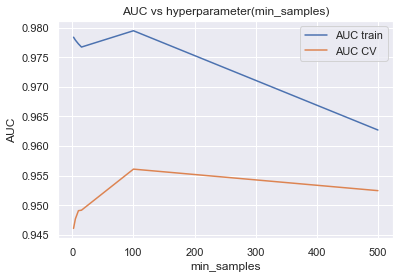

In [63]:
auc_train_m=[]
auc_cv_m=[]
for m in min_samples:
    dp,rc=0,0
    for d in depths:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=m)
        dt.fit(final_Xtr,y_tr)
        probc=dt.predict_proba(final_Xcv)[:,1]
        val=roc_auc_score(y_cv,probc)
        if val>rc:
            rc=val
            dp=d
    dt=DecisionTreeClassifier(max_depth=dp,min_samples_split=m)
    dt.fit(final_Xtr,y_tr)
    probcv=dt.predict_proba(final_Xcv)[:,1]
    auc_cv_m.append(roc_auc_score(y_cv,probcv))
    best_m.append(ms)
    probtr=dt.predict_proba(final_Xtr)[:,1]
    auc_train_m.append(roc_auc_score(y_tr,probtr))

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(min_samples, auc_train_m, label='AUC train')
ax.plot(min_samples, auc_cv_m, label='AUC CV')
plt.title('AUC vs hyperparameter(min_samples)')
plt.xlabel('min_samples')
plt.ylabel('AUC')
ax.legend()
plt.show()

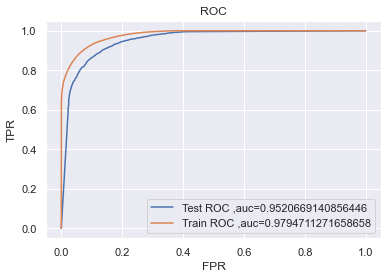

In [64]:
dt=DecisionTreeClassifier(max_depth=optimal_depth,min_samples_split=optimal_min_samples_split)
dt.fit(final_Xtr,y_tr)
predi=dt.predict_proba(final_Xtest)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=dt.predict_proba(final_Xtr)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_tr,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_tr,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

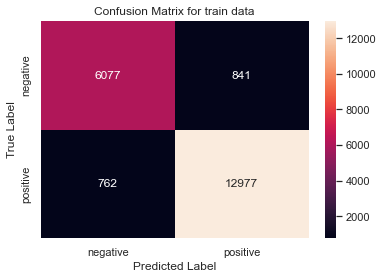

In [67]:
from sklearn.metrics import confusion_matrix

predic=dt.predict(final_Xtr)
import seaborn as sns
conf_mat = confusion_matrix(y_tr, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
decision_score=accuracy_score(y_test,predic)
print('Accuracy score for Decision Tree Model=',decision_score)

Accuracy score for Decision Tree Model= 0.9223991867163673


### KNN CLASSIFICATION


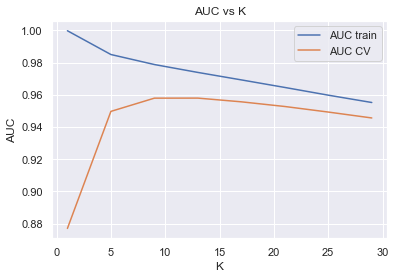

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score

X=x
y=np.array(y)



X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)
final_Xtr= X_tr
final_Xcv= X_cv
final_Xtest= X_test

auc_cv=[]
auc_train=[]
K=list(range(1,30,4))
cv_scores=[]

for i in K:
    knn=KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
    knn.fit(final_Xtr, y_tr)
    pred = knn.predict_proba(final_Xcv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,pred))
    pred1=knn.predict_proba(final_Xtr)[:,1]
    auc_train.append(roc_auc_score(y_tr,pred1))  

    
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()

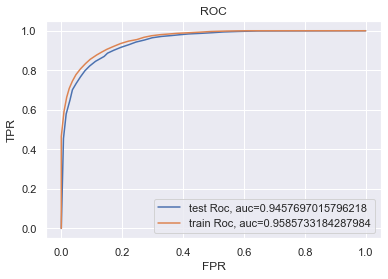

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=26, weights="uniform",algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(final_Xtr,y_tr)
predi = knn.predict_proba(final_Xtest)[:,1]
fpr1, tpr1, threshold1=metrics.roc_curve(y_test,predi)
pred = knn.predict_proba(final_Xtr)[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr,pred)
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(fpr1, tpr1, label="test Roc, auc="+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label="train Roc, auc="+str(roc_auc_score(y_tr,pred)))

plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
ax.legend()
plt.show()

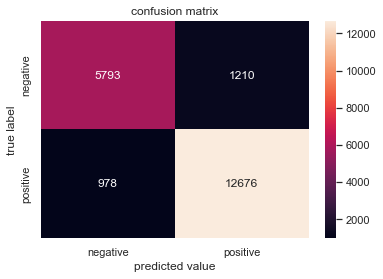

In [47]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=25,weights='uniform', algorithm="brute", leaf_size=30, p=2, metric="cosine")
knn.fit(final_Xtr,y_tr)
pred = knn.predict(final_Xtr)

import seaborn as sns
conf_mat = confusion_matrix(y_tr,pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index =class_label, columns=class_label)
sns.heatmap(df, annot=True, fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted value")
plt.ylabel("true label")
plt.show()

In [49]:
knn_score=accuracy_score(y_tr,pred)
print('Accuracy score for Knn Model=',knn_score)

Accuracy score for Knn Model= 0.8940794887931451


### SVM

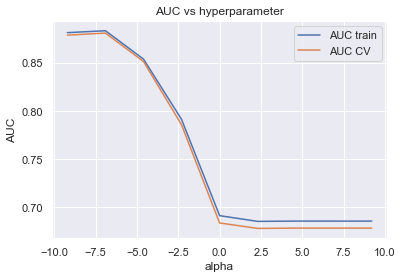

optimal alpha for which auc is maximum :  0.001


In [36]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

X=x
y=np.array(y)



X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)
final_Xtr= X_tr
final_Xcv= X_cv
final_Xtest= X_test



alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
auc_train=[]
auc_cv=[]
for a in alpha:
    model=SGDClassifier(alpha=a, class_weight="balanced") #loss default hinge
    svm=CalibratedClassifierCV(model, cv=3) #calibrated classifier cv for calculation of predic_proba
    svm.fit(final_Xtr,y_tr)
    probcv=svm.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=svm.predict_proba(final_Xtr)[:,1]
    auc_train.append(roc_auc_score(y_tr,probtr))
optimal_alpha= alpha[auc_cv.index(max(auc_cv))]
alpha=[math.log(x) for x in alpha]#converting values of alpha into logarithm
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha, auc_train, label='AUC train')
ax.plot(alpha, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_alpha)



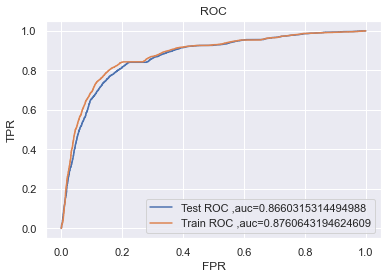

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
model=SGDClassifier(alpha=optimal_alpha, class_weight="balanced")
svm=CalibratedClassifierCV(model, cv=3)
svm.fit(final_Xtr,y_tr)
predi=svm.predict_proba(final_Xtest)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=svm.predict_proba(final_Xtr)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_tr,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_tr,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

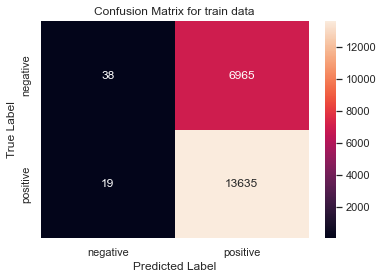

In [52]:
from sklearn.metrics import confusion_matrix

predic=svm.predict(final_Xtr)
import seaborn as sns
conf_mat = confusion_matrix(y_tr, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
svm_score=accuracy_score(y_tr,predic)
print('Accuracy score for svm Model=',svm_score)

Accuracy score for svm Model= 0.6619063755627632


### Logistic Regression

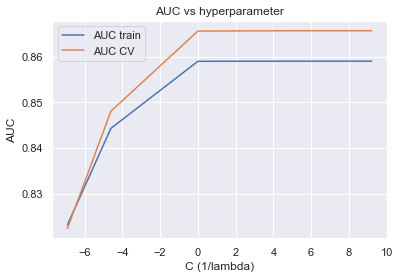

optimal lambda for which auc is maximum :  0


In [40]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X=x
y=np.array(y)





X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)
final_Xtr= X_tr
final_Xcv= X_cv
final_Xtest= X_test


C = [10**-3, 10**-2, 10**0, 10**2,10**3,10**4]#C=1/lambda
auc_train=[]
auc_cv=[]
for c in C:
    lr=LogisticRegression(penalty='l1', solver='liblinear', C=c,class_weight = 'balanced')
    lr.fit(final_Xtr,y_tr)
    probcv=lr.predict_proba(final_Xcv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=lr.predict_proba(final_Xtr)[:,1]
    auc_train.append(roc_auc_score(y_tr,probtr))
optimal_c= C[auc_cv.index(max(auc_cv))]
C=[math.log(x) for x in C]#converting values of C into logarithm
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C, auc_train, label='AUC train')
ax.plot(C, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal lambda for which auc is maximum : ',1//optimal_c)

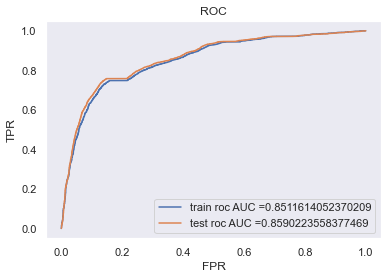

In [41]:
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(penalty = "l1",solver='liblinear', C=optimal_c,class_weight = 'balanced')
lr.fit(final_Xtr,y_tr)
predte = lr.predict_proba(final_Xtest)[:,1]
predtr = lr.predict_proba(final_Xtr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_test, predte)
test_fpr, test_tpr, te_thresholds = roc_curve(y_tr, predtr)

plt.plot(train_fpr, train_tpr, label="train roc AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test roc AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.grid()
plt.show()

In [54]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.6295466766503881 for threshold 0.437


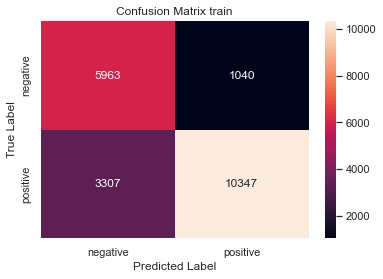

In [58]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

import seaborn as sns
cm_train = confusion_matrix(y_tr, predict_with_best_t(predtr, best_t))
class_label = ["negative", "positive"]
df = pd.DataFrame(cm_train, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix train")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
linear_regression=accuracy_score(y_tr,predict_with_best_t(predtr, best_t))
print('Accuracy score for Decision Tree Model=',linear_regression)

Accuracy score for Decision Tree Model= 0.7895628600474416
